In [1]:
import numpy as np
import random as rm

In [9]:
# Пространство состояний
states = ["Sleep","Eat","Study", "Play"]

# Возможные переходы
transitionName = [["SLSL","SLE","SLST", "SLP"],
                  ["ESL","EE","EST", "EP"],
                  ["STSL","STE","STST", "STP"],
                  ["PSL", "PE", "PST", "PP"]]

# Матрица вероятностей (матрица переходов)
transitionMatrix = [[0.6,0.2,0.1,0.1],
                    [0.1,0,0.4,0.5],
                    [0.2,0.3,0.3,0.2],
                    [0.2,0.3,0.2,0.3]]

initial_probability = [[1, 0, 0, 0],
                       [0, 1, 0, 0],
                       [0, 0, 1, 0],
                       [0, 0, 0, 1]]

In [5]:
def markov_model(days):
    # Выбираем случайное начальное состояние
    initial_state = rm.choice(states)
    start_state = initial_state
    print("Начальное состояние: " + start_state)
    state_list = [start_state]
    i = 0
    prob = 1
    while i != days:
        if start_state == "Sleep":
            change = np.random.choice(transitionName[0], replace=True, p=transitionMatrix[0])
            if change == "SLSL":
                prob = prob * 0.6
                state_list.append("Sleep")
            elif change == "SLE":
                prob = prob * 0.2
                start_state = "EAT"
                state_list.append("EAT")
            elif change == "SLST":
                prob = prob * 0.1
                start_state = "Study"
                state_list.append("Study")
            else:
                prob = prob * 0.1
                start_state = "Play"
                state_list.append("Play")
                
        elif start_state == "Eat":
            change = np.random.choice(transitionName[1], replace=True, p=transitionMatrix[1])
            if change == "ESL":
                prob = prob * 0.1
                state_list.append("Eat")
            elif change == "EST":
                prob = prob * 0.4
                start_state = "Study"
                state_list.append("Study")
            else:
                prob = prob * 0.5
                start_state = "Play"
                state_list.append("Play")

        elif start_state == "Study":
            change = np.random.choice(transitionName[2], replace=True, p=transitionMatrix[2])
            if change == "STSL":
                prob = prob * 0.2
                start_state = "Sleep"
                state_list.append("Sleep")
            elif change == "STE":
                prob = prob * 0.3
                start_state = "Eat"
                state_list.append("Eat")
            elif change == "STST":
                prob = prob * 0.3
                state_list.append("Study")
            else:
                prob = prob * 0.2
                start_state = "Play"
                state_list.append("Play")

        elif start_state == "Play":
            change = np.random.choice(transitionName[3], replace=True, p=transitionMatrix[3])
            if change == "PSL":
                prob = prob * 0.2
                start_state = "Sleep"
                state_list.append("Sleep")
            elif change == "PE":
                prob = prob * 0.3
                start_state = "Eat"
                state_list.append("Eat")
            elif change == "PST":
                prob = prob * 0.2
                start_state = "Study"
                state_list.append("Study")
            else:
                prob = prob * 0.3
                state_list.append("Play")

        i += 1

    print("Возможные состояния: " + str(state_list))
    print("Конечное состояние через " + str(days) + " дней: " + start_state)
    print("Вероятность возможной последовательности состояний: " + str(prob))



In [6]:
# Предсказание возможного состояния
for i in range(4, 9):
    markov_model(i)

Начальное состояние: Sleep
Возможные состояния: ['Sleep', 'EAT']
Конечное состояние через 4 дней: EAT
Вероятность возможной последовательности состояний: 0.2
Начальное состояние: Study
Возможные состояния: ['Study', 'Eat', 'Play', 'Play', 'Sleep', 'Sleep']
Конечное состояние через 5 дней: Sleep
Вероятность возможной последовательности состояний: 0.005399999999999999
Начальное состояние: Play
Возможные состояния: ['Play', 'Eat', 'Study', 'Sleep', 'EAT']
Конечное состояние через 6 дней: EAT
Вероятность возможной последовательности состояний: 0.0048000000000000004
Начальное состояние: Eat
Возможные состояния: ['Eat', 'Study', 'Study', 'Sleep', 'EAT']
Конечное состояние через 7 дней: EAT
Вероятность возможной последовательности состояний: 0.0048000000000000004
Начальное состояние: Eat
Возможные состояния: ['Eat', 'Play', 'Study', 'Study', 'Study', 'Sleep', 'Sleep', 'Study', 'Play']
Конечное состояние через 8 дней: Play
Вероятность возможной последовательности состояний: 2.1600000000000003e

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt

def calculate_standard_deviation(v1, v2):
    return np.sqrt(np.sum((np.array(v2) - np.array(v1))**2) / (len(v1) - 1))

def plot_graph_of_standard_deviation(x, y, initial_prob):
    plt.plot(x, y, marker='o', linestyle='-')
    plt.xlabel("Шаги")
    plt.ylabel("Среднеквадратичное отклонение")
    plt.title(f"Сходимость марковской цепи (Начальное: {initial_prob})")
    plt.show()

def simulate_markov_chain(transition_matrix, initial_prob, eps=1e-6):
    prev_prob = np.array(initial_prob)
    new_prob = np.dot(prev_prob, transition_matrix)
    standard_deviation = calculate_standard_deviation(prev_prob, new_prob)
    steps_count = 1
    x, y = [steps_count], [standard_deviation]

    while standard_deviation > eps:
        prev_prob = new_prob
        new_prob = np.dot(prev_prob, transition_matrix)
        standard_deviation = calculate_standard_deviation(prev_prob, new_prob)
        steps_count += 1
        x.append(steps_count)
        y.append(standard_deviation)

    plot_graph_of_standard_deviation(x, y, initial_prob)
    return new_prob, steps_count


In [11]:
def simulation_Markov_chain_analytically(matrix):
    matrix = np.array(matrix)
    a = matrix.transpose() - np.identity(len(matrix))
    a[len(matrix) - 1] = np.ones(len(matrix))

    b = np.zeros(len(matrix))
    b[len(matrix) - 1] = 1

    return np.linalg.solve(a, b)

analytical_solution = simulation_Markov_chain_analytically(transitionMatrix)
print(f"Аналитическое стационарное распределение: {analytical_solution}\n")


Аналитическое стационарное распределение: [0.2987013  0.20779221 0.23520924 0.25829726]



In [14]:
def simulate_chain(P, initial_vector, epsilon=1e-6, max_steps=1000):
    current = initial_vector.copy()
    history = [current.copy()]
    rms_errors = []

    for step in range(max_steps):
        new = np.dot(current, P)
        # Вычисление среднеквадратичного отклонения между итерациями
        rms = np.sqrt(np.mean((new - current) ** 2))
        rms_errors.append(rms)
        history.append(new.copy())
        if rms < epsilon:
            break
        current = new
    return np.array(history), rms_errors

In [15]:
# Зададим несколько различных начальных векторов:
initial_vectors = {f"Начало в {state}": np.eye(len(states))[i] for i, state in enumerate(states)}

# Для хранения результатов моделирования
sim_results = {}

# Моделирование для каждого начального вектора
for label, init_vec in initial_vectors.items():
    history, rms_errors = simulate_chain(transitionMatrix, init_vec, epsilon=1e-6, max_steps=1000)
    sim_results[label] = {
        "history": history,
        "rms_errors": rms_errors,
        "final_vector": history[-1]
    }
    print(f"{label}: достигнуто за {len(history) - 1} шагов, финальный вектор: {history[-1]}")

Начало в Sleep: достигнуто за 16 шагов, финальный вектор: [0.29870183 0.20779213 0.23520902 0.25829702]
Начало в Eat: достигнуто за 15 шагов, финальный вектор: [0.29870057 0.20779229 0.23520954 0.2582976 ]
Начало в Study: достигнуто за 14 шагов, финальный вектор: [0.29870015 0.20779235 0.23520971 0.25829779]
Начало в Play: достигнуто за 14 шагов, финальный вектор: [0.29870015 0.20779235 0.23520971 0.25829779]


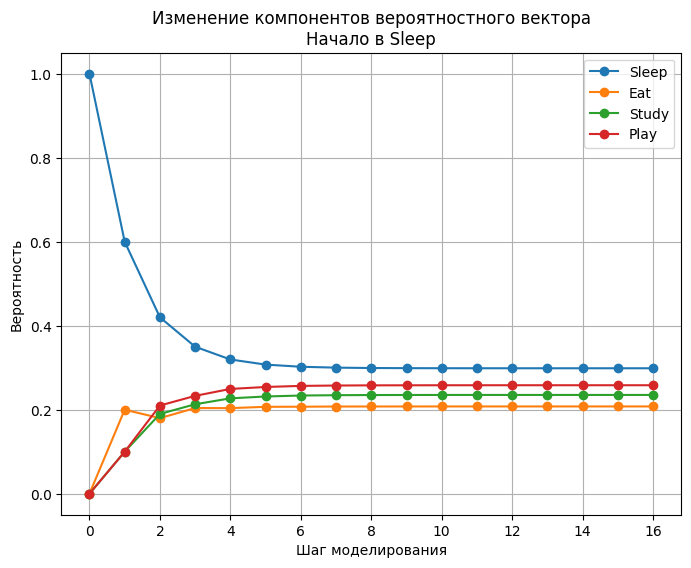

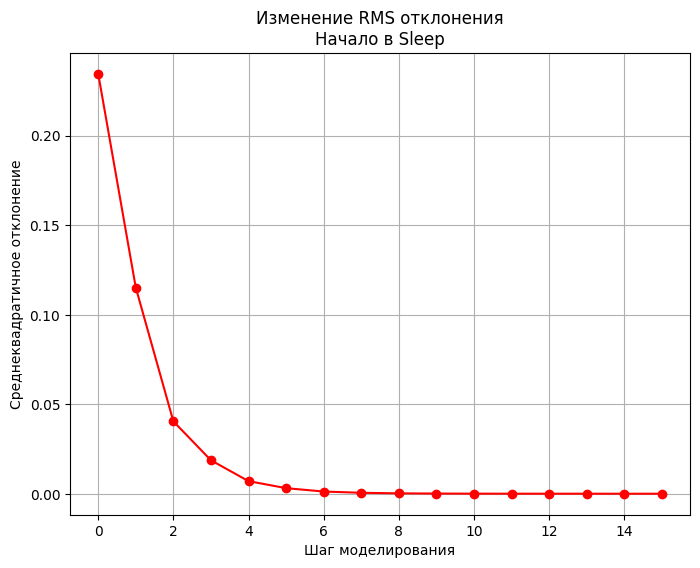

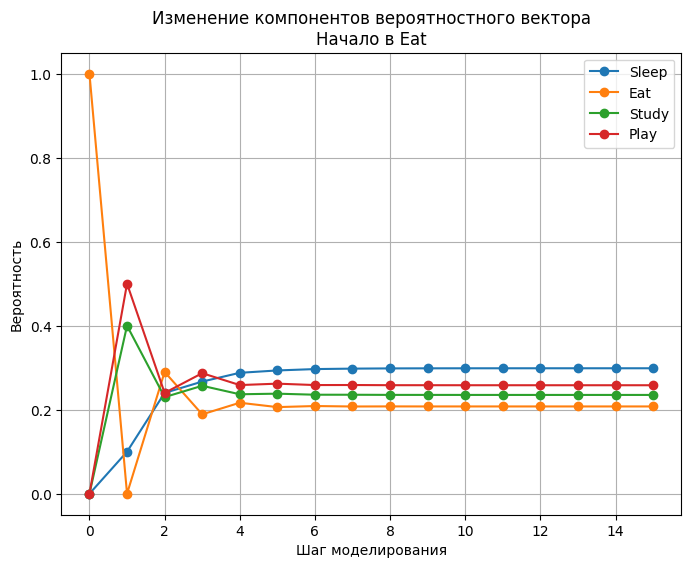

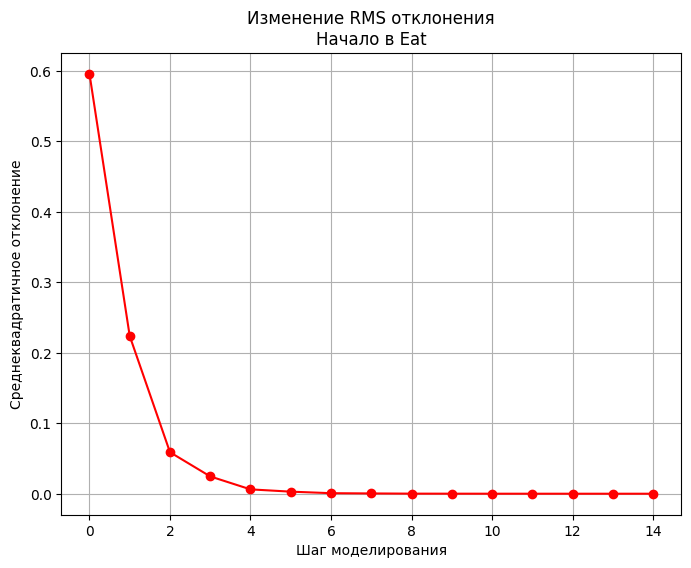

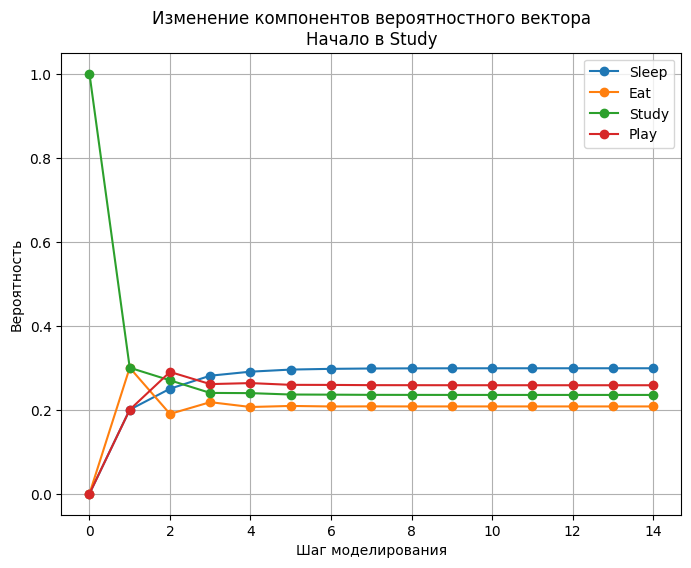

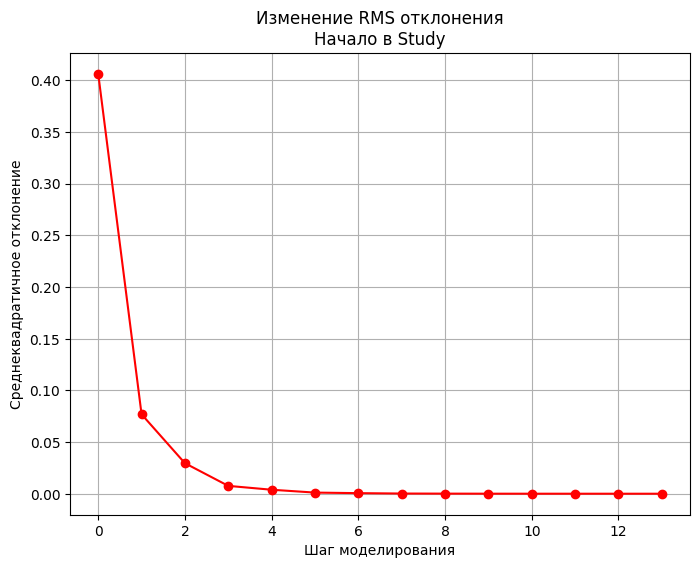

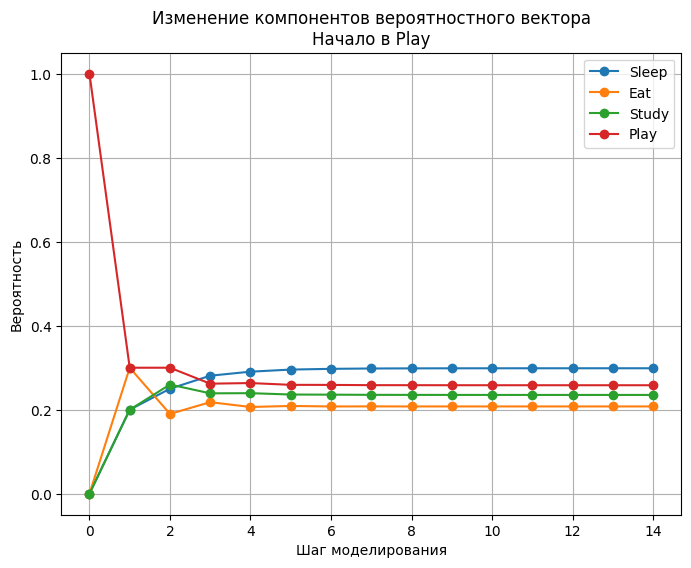

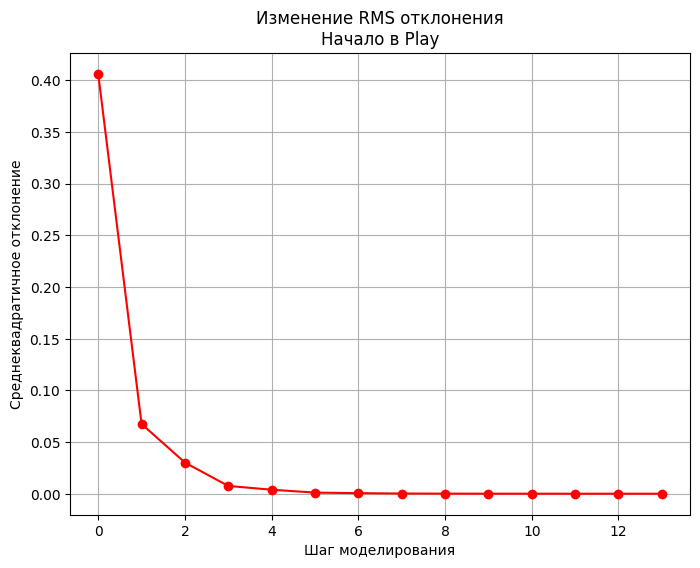

In [16]:
# Графики для каждого начального вектора: компоненты вероятностного вектора по шагам
for label, result in sim_results.items():
    history = result["history"]
    steps = np.arange(history.shape[0])

    plt.figure(figsize=(8, 6))
    for i, state in enumerate(states):
        plt.plot(steps, history[:, i], marker='o', label=state)
    plt.xlabel("Шаг моделирования")
    plt.ylabel("Вероятность")
    plt.title(f"Изменение компонентов вероятностного вектора\n{label}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # График изменения среднеквадратичного отклонения
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(result["rms_errors"])), result["rms_errors"], marker='o', color='red')
    plt.xlabel("Шаг моделирования")
    plt.ylabel("Среднеквадратичное отклонение")
    plt.title(f"Изменение RMS отклонения\n{label}")
    plt.grid(True)
    plt.show()